In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Метод прогонки

In [6]:
def method_progonki(a, b, c, d):
    """
    Решение системы с трехдиагональной матрицей методом прогонки.

    a - нижняя диагональ (1 <= i <= n-1)
    b - главная диагональ (0 <= i <= n-1)
    c - верхняя диагональ (0 <= i <= n-2)
    d - правая часть уравнения
    """
    n = len(d)
    alpha = np.zeros(n)
    beta = np.zeros(n)

    # прямой ход
    alpha[0] = -c[0] / b[0]
    beta[0] = d[0] / b[0]
    for i in range(1, n):
        gamma = b[i] + a[i] * alpha[i - 1]
        alpha[i] = -c[i] / gamma if i < n - 1 else 0
        beta[i] = (d[i] - a[i] * beta[i - 1]) / gamma

    # обратный ход
    u = np.zeros(n)
    u[-1] = beta[-1]
    for i in range(n - 2, -1, -1):
        u[i] = alpha[i] * u[i + 1] + beta[i]

    return u

## Тестовая задача
$u''(x) = -\pi^2 \sin(\pi x), u(0) = 0, u(1) = 0$

In [7]:
x_left = 0
x_right = 2
n = 100
x = np.linspace(x_left, x_right, n)
h = (x_right - x_left) / (n - 1)

# коэффициенты
a = np.ones(n) / h ** 2
b = -2 / h ** 2
c = np.ones(n) / h ** 2
d = -np.pi ** 2 * np.sin(np.pi * x)  # правая часть уравнения

# граничные условия: u(0) = 0, u(1) = 0
d[0] = 0
d[-1] = 0
b = np.full(n, -2 / h ** 2)  # коэффициент основной диагонали для теста

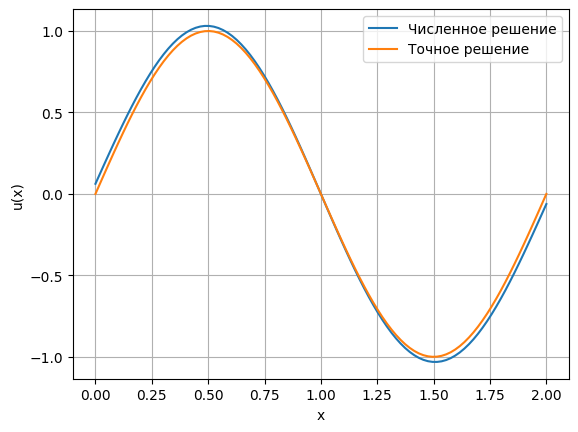

In [8]:
u_test = method_progonki(a, b, c, d)
u_exact = np.sin(np.pi * x)

plt.plot(x, u_test, label="Численное решение")
plt.plot(x, u_exact, label="Точное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

## Основная задача

In [12]:
x_left = 1.2
x_right = 2.2
n = 100
x = np.linspace(x_left, x_right, n)
h = (x_right - x_left) / (n - 1)

a = np.ones(n) / h ** 2 + x / (2 * h)
b = -2 / h ** 2 + 2 * x
c = np.ones(n) / h ** 2 - x / (2 * h)
d = np.full(n, 2.8)

# граничные условия
# на левой границе: u(1.2) - 0.2 * u'(1.2) = 0.2
d[0] = 0.2 / h  # это первое уравнение с разностным отношением для u'(1.2)
b[0] = 1 - 0.2 / (2 * h)  # коэффициенты для граничного условия
c[0] = 0

# на правой границе: u'(2.2) = 4
d[-1] = 4  # это второе граничное условие
a[-1] = -1 / (2 * h)  # коэффициенты для u'(2.2)
b[-1] = 1
c[-1] = 0

u = method_progonki(a, b, c, d)

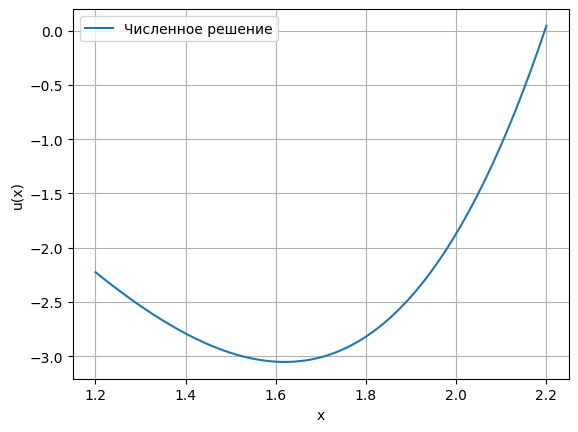

In [13]:
plt.plot(x, u, label="Численное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()